# Evaluation of models predicting the electricity prices

In [66]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data

In [67]:
# path to numpy files
# arima = 'output/forecast_ARIMA.npy'
sarima = 'output/forecast_sarima.npy'
sarimax = 'output/forecast_sarimax.npy'
lstm = 'output/forecast_LSTM.npy'
data = '../../data/fulldata.csv'

# load numpy files
# arima_forecast = np.load(arima)
sarima_forecast = np.load(sarima)
sarimax_forecast = np.load(sarimax)
lstm_forecast = np.load(lstm)

# load test data
data = pd.read_csv(data)
data = data[['SpotPriceDKK', 'from']]
data['from'] = pd.to_datetime(data['from'])
data = data.set_index('from')
data = data[data.index >= '2024-08-01']
data.sort_index(inplace=True)
# ensure lengths match
actuals = data['SpotPriceDKK'].values


# length of test data
print(f'SARIMA length: {len(sarima_forecast)}\nSARIMAX length: {len(sarimax_forecast)}\nLSTM length: {len(lstm_forecast)}\nActuals length: {len(data)}')

SARIMA length: 2904
SARIMAX length: 2904
LSTM length: 2904
Actuals length: 2904


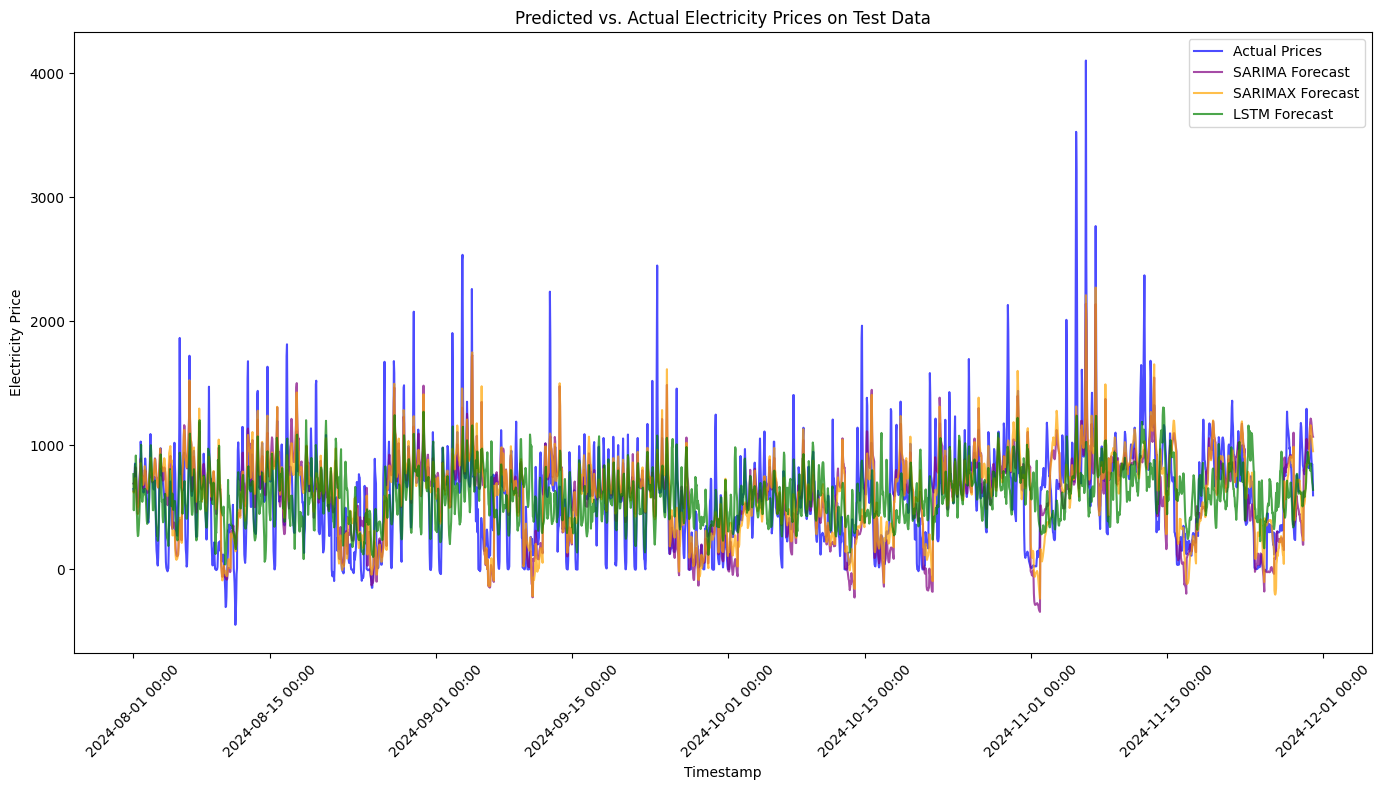

In [68]:
# extract 'from' timestamps from test_data, adjusted for seq_length
# since the dataset uses sequences, the first 'seq_length' targets are not included in 'actuals' and 'predictions'
timestamps = data.index.values

# create the plot
plt.figure(figsize=(14, 8))
plt.plot(timestamps, actuals, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(timestamps[:len(sarima_forecast)], sarima_forecast, label='SARIMA Forecast', color='purple', alpha=0.7)
plt.plot(timestamps[:len(sarimax_forecast)], sarimax_forecast, label='SARIMAX Forecast', color='orange', alpha=0.7)
plt.plot(timestamps[:len(lstm_forecast)], lstm_forecast, label='LSTM Forecast', color='green', alpha=0.7)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Electricity Price')
plt.title('Predicted vs. Actual Electricity Prices on Test Data')

# format x-axis with date labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('output/predicted_v_actuals.png')

plt.show()

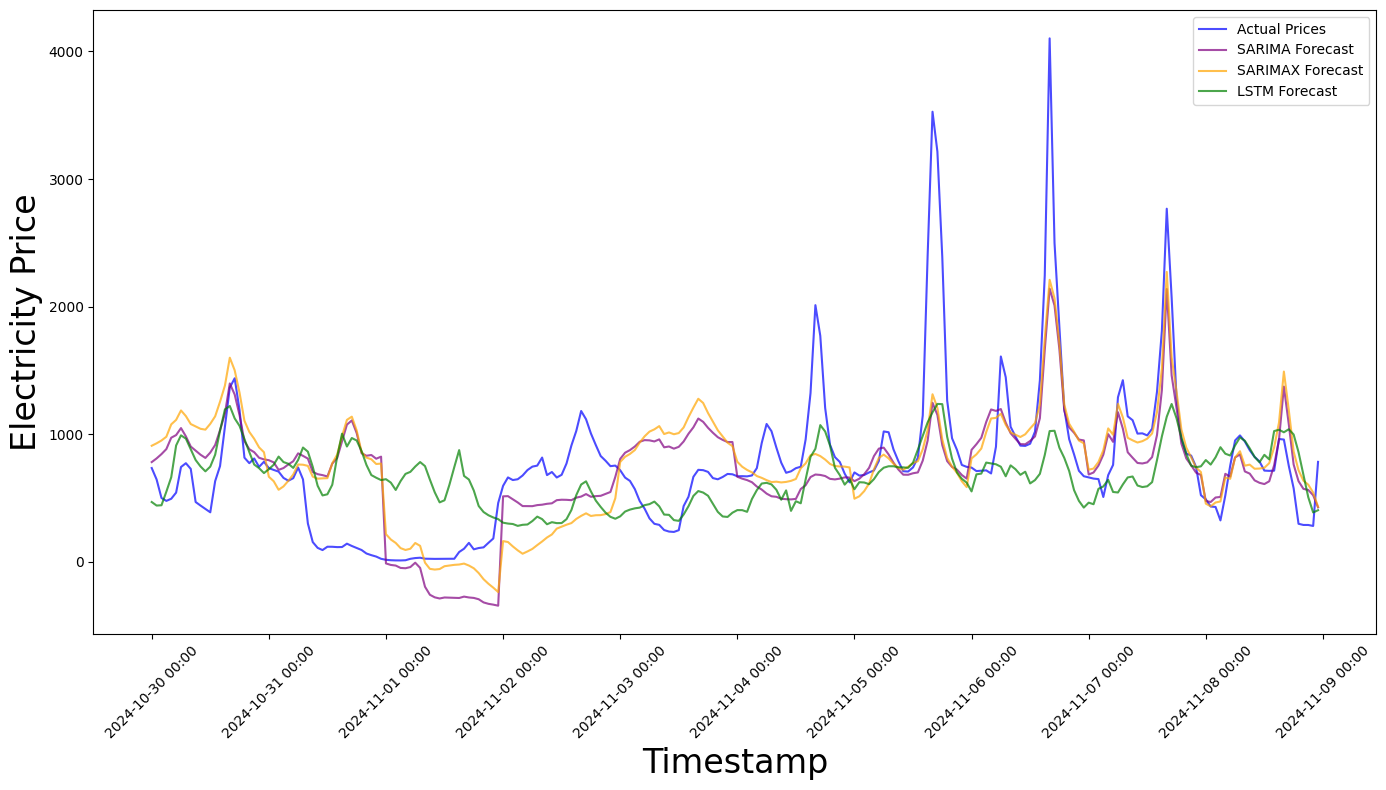

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the range of points (indices) you want to plot
FROM_IDX = 24*90     # inclusive start
TO_IDX   = 24*100   # exclusive end


# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(timestamps[FROM_IDX:TO_IDX], actuals[FROM_IDX:TO_IDX], label='Actual Prices', color='blue', alpha=0.7)
plt.plot(timestamps[FROM_IDX:TO_IDX], sarima_forecast[FROM_IDX:TO_IDX], label='SARIMA Forecast', color='purple', alpha=0.7)
plt.plot(timestamps[FROM_IDX:TO_IDX], sarimax_forecast[FROM_IDX:TO_IDX],  label='SARIMAX Forecast', color='orange', alpha=0.7)
plt.plot(timestamps[FROM_IDX:TO_IDX], lstm_forecast[FROM_IDX:TO_IDX], label='LSTM Forecast', color='green', alpha=0.7)


plt.legend()
plt.xlabel('Timestamp', fontsize=24)
plt.ylabel('Electricity Price', fontsize=24)
# plt.title('Predicted vs. Actual Electricity Prices (Custom Slice)')

# Format x-axis with date labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('output/predicted_v_actuals_subset.png')
plt.show()


In [70]:
print(f'SARIMA RMSE:{root_mean_squared_error(actuals, sarima_forecast)}\nSARIMA MAE:{mean_absolute_error(actuals, sarima_forecast)}\n')
print(f'SARIMAX RMSE:{root_mean_squared_error(actuals, sarimax_forecast)}\nSARIMAX MAE:{mean_absolute_error(actuals, sarimax_forecast)}\n')
print(f'LSTM RMSE:{root_mean_squared_error(actuals, lstm_forecast)}\nLSTM MAE:{mean_absolute_error(actuals, lstm_forecast)}\n')

SARIMA RMSE:318.46916586414295
SARIMA MAE:222.40663555824548

SARIMAX RMSE:313.69663388628703
SARIMAX MAE:224.53355394060227

LSTM RMSE:324.0368668680345
LSTM MAE:249.27221203470455

